The following notebook contains all the code necessary to produce the panels presented in __Figure 1 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 CMIP6 preindustrial control output provided through the Earth System Grid Federation (ESGF) (Krasting et al., 2018):

> Krasting, J. P., and Coauthors, 2018a: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8669.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import momlevel as ml

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 12,6   #default figure size

### Load datasets needed for assessment. The piControl field is sliced to only load the corresponding years that overlap with the experiments.

In [2]:
## Temperature at 2 m
esm4_ant1_sat = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*t_ref.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_sat = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*t_ref.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_sat = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*t_ref.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_sat = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*t_ref.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_sat = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*t_ref.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_sat = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*.t_ref.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [3]:
## Total precipitation rate
esm4_ant1_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*.precip.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [2]:
## Atmospheric temperature
esm4_ant1_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [5]:
## model diagnosed tropopause air pressure (Pa)
esm4_ant1_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant2_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant3_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant4_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant5_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_piC_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))*0.01

In [6]:
## model diagnosed tropopause altitude (m)
esm4_ant1_ztp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ztp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_ztp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ztp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_ztp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ztp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_ztp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ztp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_ztp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ztp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_ztp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ztp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [7]:
## zonal wind stress
esm4_ant1_taux = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*.tauuo.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_taux = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*.tauuo.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_taux = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*.tauuo.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_taux = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*.tauuo.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_taux = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*.tauuo.nc',
                                use_cftime=True, combine = 'by_coords')
esm4_piC_taux = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/*.tauuo.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

CPU times: user 7.13 s, sys: 2.16 s, total: 9.29 s
Wall time: 1min 42s


In [8]:
## sea ice concentration
esm4_ant1_si = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/ice/ts/monthly/5yr/*siconc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_si = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/ice/ts/monthly/5yr/*siconc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_si = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/ice/ts/monthly/5yr/*siconc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_si = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/ice/ts/monthly/5yr/*siconc.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_si = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/ice/ts/monthly/5yr/*siconc.nc',
                                use_cftime=True, combine = 'by_coords')
esm4_piC_si = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ice/ts/monthly/5yr/*siconc.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0400-12-16'))

## Load static file

In [9]:
## file containing ocean static fields
esm4_static = xr.open_dataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual/ocean_annual.static.nc')

### Create time average of last 20 years of the perturbation experiments and load piControl into memory.

In [10]:
esm4_ant1_sat_last20 = esm4_ant1_sat.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_sat_last20 = esm4_ant2_sat.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_sat_last20 = esm4_ant3_sat.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_sat_last20 = esm4_ant4_sat.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_sat_last20 = esm4_ant5_sat.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_sat_ave = esm4_piC_sat.mean(dim='time').load()

In [4]:
esm4_ant1_temp_last20 = esm4_ant1_temp.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_temp_last20 = esm4_ant2_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_temp_last20 = esm4_ant3_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_temp_last20 = esm4_ant4_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_temp_last20 = esm4_ant5_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_temp_ave = esm4_piC_temp.mean(dim='time').load()

In [12]:
esm4_ant1_ptp_last20 = esm4_ant1_ptp.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_ptp_last20 = esm4_ant2_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_ptp_last20 = esm4_ant3_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_ptp_last20 = esm4_ant4_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_ptp_last20 = esm4_ant5_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_ptp_ave = esm4_piC_ptp.mean(dim='time').load()

In [13]:
esm4_ant1_ztp_last20 = esm4_ant1_ztp.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_ztp_last20 = esm4_ant2_ztp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_ztp_last20 = esm4_ant3_ztp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_ztp_last20 = esm4_ant4_ztp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_ztp_last20 = esm4_ant5_ztp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_ztp_ave = esm4_piC_ztp.mean(dim='time').load()

In [14]:
esm4_ant1_precip_last20 = esm4_ant1_precip.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_precip_last20 = esm4_ant2_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_precip_last20 = esm4_ant3_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_precip_last20 = esm4_ant4_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_precip_last20 = esm4_ant5_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_precip_ave = esm4_piC_precip.mean(dim='time').load()

In [15]:
ant1_taux_last20 = esm4_ant1_taux.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
ant2_taux_last20 = esm4_ant2_taux.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
ant3_taux_last20 = esm4_ant3_taux.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
ant4_taux_last20 = esm4_ant4_taux.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
ant5_taux_last20 = esm4_ant5_taux.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
piC_taux_ave = esm4_piC_taux.mean(dim='time').load()

In [16]:
ant1_sic_last20 = esm4_ant1_si.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
ant2_sic_last20 = esm4_ant2_si.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
ant3_sic_last20 = esm4_ant3_si.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
ant4_sic_last20 = esm4_ant4_si.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
ant5_sic_last20 = esm4_ant5_si.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
piC_sic_ave = (esm4_piC_si.mean(dim='time')).load()

### Create ensemble means

In [17]:
esm4_ant_sat_ens = xr.concat([esm4_ant1_sat_last20,
                         esm4_ant2_sat_last20,
                         esm4_ant3_sat_last20,
                         esm4_ant4_sat_last20,
                         esm4_ant5_sat_last20],dim='member')
esm4_ant_sat_ens_ave = esm4_ant_sat_ens.mean(dim='member')

In [5]:
esm4_ant_temp_ens = xr.concat([esm4_ant1_temp_last20,
                         esm4_ant2_temp_last20,
                         esm4_ant3_temp_last20,
                         esm4_ant4_temp_last20,
                         esm4_ant5_temp_last20],dim='member')
esm4_ant_temp_ens_ave = esm4_ant_temp_ens.mean(dim='member')

In [19]:
esm4_ant_ptp_ens = xr.concat([esm4_ant1_ptp_last20,
                         esm4_ant2_ptp_last20,
                         esm4_ant3_ptp_last20,
                         esm4_ant4_ptp_last20,
                         esm4_ant5_ptp_last20],dim='member')
esm4_ant_ptp_ens_ave = esm4_ant_ptp_ens.mean(dim='member')

In [20]:
esm4_ant_ztp_ens = xr.concat([esm4_ant1_ztp_last20,
                         esm4_ant2_ztp_last20,
                         esm4_ant3_ztp_last20,
                         esm4_ant4_ztp_last20,
                         esm4_ant5_ztp_last20],dim='member')
esm4_ant_ztp_ens_ave = esm4_ant_ztp_ens.mean(dim='member')

In [21]:
esm4_ant_precip_ens = xr.concat([esm4_ant1_precip_last20,
                         esm4_ant2_precip_last20,
                         esm4_ant3_precip_last20,
                         esm4_ant4_precip_last20,
                         esm4_ant5_precip_last20],dim='member')
esm4_ant_precip_ens_ave = esm4_ant_precip_ens.mean(dim='member')

In [22]:
ant_sic_ens = xr.concat([ant1_sic_last20,
                         ant2_sic_last20,
                         ant3_sic_last20,
                         ant4_sic_last20,
                         ant5_sic_last20],dim='member')
ant_sic_ens_ave = ant_sic_ens.mean(dim='member')

In [23]:
ant_taux_ens = xr.concat([ant1_taux_last20,
                         ant2_taux_last20,
                         ant3_taux_last20,
                         ant4_taux_last20,
                         ant5_taux_last20],dim='member')
ant_taux_ens_ave = ant_taux_ens.mean(dim='member')

### Compute anomalies relative to piControl

In [24]:
diff_sat_ant1 = esm4_ant1_sat_last20 - esm4_piC_sat_ave
diff_sat_ant2 = esm4_ant2_sat_last20 - esm4_piC_sat_ave
diff_sat_ant3 = esm4_ant3_sat_last20 - esm4_piC_sat_ave
diff_sat_ant4 = esm4_ant4_sat_last20 - esm4_piC_sat_ave
diff_sat_ant5 = esm4_ant5_sat_last20 - esm4_piC_sat_ave
diff_sat_ens = esm4_ant_sat_ens_ave - esm4_piC_sat_ave

In [6]:
diff_temp_ant1 = esm4_ant1_temp_last20 - esm4_piC_temp_ave
diff_temp_ant2 = esm4_ant2_temp_last20 - esm4_piC_temp_ave
diff_temp_ant3 = esm4_ant3_temp_last20 - esm4_piC_temp_ave
diff_temp_ant4 = esm4_ant4_temp_last20 - esm4_piC_temp_ave
diff_temp_ant5 = esm4_ant5_temp_last20 - esm4_piC_temp_ave
diff_temp_ens = esm4_ant_temp_ens_ave - esm4_piC_temp_ave

In [26]:
diff_ptp_ant1 = esm4_ant1_ptp_last20 - esm4_piC_ptp_ave
diff_ptp_ant2 = esm4_ant2_ptp_last20 - esm4_piC_ptp_ave
diff_ptp_ant3 = esm4_ant3_ptp_last20 - esm4_piC_ptp_ave
diff_ptp_ant4 = esm4_ant4_ptp_last20 - esm4_piC_ptp_ave
diff_ptp_ant5 = esm4_ant5_ptp_last20 - esm4_piC_ptp_ave
diff_ptp_ens = esm4_ant_ptp_ens_ave - esm4_piC_ptp_ave

In [27]:
diff_ztp_ant1 = esm4_ant1_ztp_last20 - esm4_piC_ztp_ave
diff_ztp_ant2 = esm4_ant2_ztp_last20 - esm4_piC_ztp_ave
diff_ztp_ant3 = esm4_ant3_ztp_last20 - esm4_piC_ztp_ave
diff_ztp_ant4 = esm4_ant4_ztp_last20 - esm4_piC_ztp_ave
diff_ztp_ant5 = esm4_ant5_ztp_last20 - esm4_piC_ztp_ave
diff_ztp_ens = esm4_ant_ztp_ens_ave - esm4_piC_ztp_ave

In [28]:
diff_precip_ant1 = esm4_ant1_precip_last20 - esm4_piC_precip_ave
diff_precip_ant2 = esm4_ant2_precip_last20 - esm4_piC_precip_ave
diff_precip_ant3 = esm4_ant3_precip_last20 - esm4_piC_precip_ave
diff_precip_ant4 = esm4_ant4_precip_last20 - esm4_piC_precip_ave
diff_precip_ant5 = esm4_ant5_precip_last20 - esm4_piC_precip_ave
diff_precip_ens = esm4_ant_precip_ens_ave - esm4_piC_precip_ave

### Adding geolon / geolat as coordinates to data arrays for plotting

In [29]:
diff_taux_ant1 = (ant1_taux_last20 - piC_taux_ave).assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})
diff_taux_ant2 = (ant2_taux_last20 - piC_taux_ave).assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})
diff_taux_ant3 = (ant3_taux_last20 - piC_taux_ave).assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})
diff_taux_ant4 = (ant4_taux_last20 - piC_taux_ave).assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})
diff_taux_ant5 = (ant5_taux_last20 - piC_taux_ave).assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})
diff_taux_ens = (ant_taux_ens_ave - piC_taux_ave).assign_coords({'geolon_u':esm4_static['geolon_u'],
                             'geolat_u':esm4_static['geolat_u']})

### Compute 20-year rolling mean of piControl data for assessment of natural variability

In [7]:
esm4_piC_sat_ann = ml.util.annual_average(esm4_piC_sat.t_ref, tcoord='time')
esm4_piC_sat_ann_20 = esm4_piC_sat_ann.rolling(time=20, center=True).mean()
esm4_piC_sat_ann_20_std = esm4_piC_sat_ann_20.std(dim='time')

esm4_piC_temp_ann = ml.util.annual_average(esm4_piC_temp.temp, tcoord='time')
esm4_piC_temp_ann_20 = esm4_piC_temp_ann.rolling(time=20, center=True).mean()
esm4_piC_temp_ann_20_std = esm4_piC_temp_ann_20.std(dim='time')

esm4_piC_ptp_ann = ml.util.annual_average(esm4_piC_ptp.ptp, tcoord='time')
esm4_piC_ptp_ann_20 = esm4_piC_ptp_ann.rolling(time=20, center=True).mean()
esm4_piC_ptp_ann_20_std = esm4_piC_ptp_ann_20.std(dim='time')

esm4_piC_ztp_ann = ml.util.annual_average(esm4_piC_ztp.ztp, tcoord='time')
esm4_piC_ztp_ann_20 = esm4_piC_ztp_ann.rolling(time=20, center=True).mean()
esm4_piC_ztp_ann_20_std = esm4_piC_ztp_ann_20.std(dim='time')

esm4_piC_precip_ann = ml.util.annual_average(esm4_piC_precip.precip, tcoord='time')
esm4_piC_precip_ann_20 = esm4_piC_precip_ann.rolling(time=20, center=True).mean()
esm4_piC_precip_ann_20_std = esm4_piC_precip_ann_20.std(dim='time')

esm4_piC_taux_ann = ml.util.annual_average(esm4_piC_taux.tauuo.sel(time=slice('0101-01-16','0400-12-16')), tcoord='time')
esm4_piC_taux_ann_20 = esm4_piC_taux_ann.rolling(time=20, center=True).mean()
esm4_piC_taux_ann_20_std = esm4_piC_taux_ann_20.std(dim='time')

In [35]:
abs_diff_taux_ant1 = abs(diff_taux_ant1.tauuo)
abs_diff_taux_ant2 = abs(diff_taux_ant2.tauuo)
abs_diff_taux_ant3 = abs(diff_taux_ant3.tauuo)
abs_diff_taux_ant4 = abs(diff_taux_ant4.tauuo)
abs_diff_taux_ant5 = abs(diff_taux_ant5.tauuo)
abs_diff_taux_ens = abs(diff_taux_ens.tauuo)

In [36]:
abs_diff_sat_ant1 = abs(diff_sat_ant1.t_ref)
abs_diff_sat_ant2 = abs(diff_sat_ant2.t_ref)
abs_diff_sat_ant3 = abs(diff_sat_ant3.t_ref)
abs_diff_sat_ant4 = abs(diff_sat_ant4.t_ref)
abs_diff_sat_ant5 = abs(diff_sat_ant5.t_ref)
abs_diff_sat_ens = abs(diff_sat_ens.t_ref)

In [9]:
abs_diff_temp_ant1 = abs(diff_temp_ant1.temp)
abs_diff_temp_ant2 = abs(diff_temp_ant2.temp)
abs_diff_temp_ant3 = abs(diff_temp_ant3.temp)
abs_diff_temp_ant4 = abs(diff_temp_ant4.temp)
abs_diff_temp_ant5 = abs(diff_temp_ant5.temp)
abs_diff_temp_ens = abs(diff_temp_ens.temp)

In [38]:
abs_diff_ptp_ant1 = abs(diff_ptp_ant1.ptp)
abs_diff_ptp_ant2 = abs(diff_ptp_ant2.ptp)
abs_diff_ptp_ant3 = abs(diff_ptp_ant3.ptp)
abs_diff_ptp_ant4 = abs(diff_ptp_ant4.ptp)
abs_diff_ptp_ant5 = abs(diff_ptp_ant5.ptp)
abs_diff_ptp_ens = abs(diff_ptp_ens.ptp)

In [39]:
abs_diff_ztp_ant1 = abs(diff_ztp_ant1.ztp)
abs_diff_ztp_ant2 = abs(diff_ztp_ant2.ztp)
abs_diff_ztp_ant3 = abs(diff_ztp_ant3.ztp)
abs_diff_ztp_ant4 = abs(diff_ztp_ant4.ztp)
abs_diff_ztp_ant5 = abs(diff_ztp_ant5.ztp)
abs_diff_ztp_ens = abs(diff_ztp_ens.ztp)

In [40]:
abs_diff_precip_ant1 = abs(diff_precip_ant1.precip)
abs_diff_precip_ant2 = abs(diff_precip_ant2.precip)
abs_diff_precip_ant3 = abs(diff_precip_ant3.precip)
abs_diff_precip_ant4 = abs(diff_precip_ant4.precip)
abs_diff_precip_ant5 = abs(diff_precip_ant5.precip)
abs_diff_precip_ens = abs(diff_precip_ens.precip)

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [41]:
ant1_gt_1p64_std_sat = abs_diff_sat_ant1.where(abs_diff_sat_ant1>1.64*esm4_piC_sat_ann_20_std)
ant2_gt_1p64_std_sat = abs_diff_sat_ant2.where(abs_diff_sat_ant2>1.64*esm4_piC_sat_ann_20_std)
ant3_gt_1p64_std_sat = abs_diff_sat_ant3.where(abs_diff_sat_ant3>1.64*esm4_piC_sat_ann_20_std)
ant4_gt_1p64_std_sat = abs_diff_sat_ant4.where(abs_diff_sat_ant4>1.64*esm4_piC_sat_ann_20_std)
ant5_gt_1p64_std_sat = abs_diff_sat_ant5.where(abs_diff_sat_ant5>1.64*esm4_piC_sat_ann_20_std)
ens_gt_1p64_std_sat = abs_diff_sat_ens.where(abs_diff_sat_ens>1.64*esm4_piC_sat_ann_20_std)

In [42]:
ant1_lt_1p64_std_sat = abs_diff_sat_ant1.where(abs_diff_sat_ant1<1.64*esm4_piC_sat_ann_20_std)
ant2_lt_1p64_std_sat = abs_diff_sat_ant2.where(abs_diff_sat_ant2<1.64*esm4_piC_sat_ann_20_std)
ant3_lt_1p64_std_sat = abs_diff_sat_ant3.where(abs_diff_sat_ant3<1.64*esm4_piC_sat_ann_20_std)
ant4_lt_1p64_std_sat = abs_diff_sat_ant4.where(abs_diff_sat_ant4<1.64*esm4_piC_sat_ann_20_std)
ant5_lt_1p64_std_sat = abs_diff_sat_ant5.where(abs_diff_sat_ant5<1.64*esm4_piC_sat_ann_20_std)
ens_lt_1p64_std_sat = abs_diff_sat_ens.where(abs_diff_sat_ens<1.64*esm4_piC_sat_ann_20_std)

### Functions to set up maps

In [11]:
def plot_globalmap_difference_sat(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-3,vmax=3, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    

def plot_globalmap_difference_sst(arr,title):
    subplot_kws=dict(projection=ccrs.Robinson(central_longitude=(-150)),
                 facecolor='grey')
    
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw=subplot_kws)
    ax = arr.plot.contourf(x='geolon',y='geolat',
        transform=ccrs.PlateCarree(),
        vmin=-3,vmax=3, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    plt.title(title)
    ax.axes.coastlines()


def plot_globalmap_difference_temp(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-1,vmax=1, levels=80, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['.'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    
    
    
def plot_globalmap_difference_ptp(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-8,vmax=8, levels=80, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    

def plot_globalmap_difference_ztp(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-175,vmax=175, levels=80, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()
    
def plot_globalmap_difference_precip(arr,array_std,title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-1.2,vmax=1.2, levels=80, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    plt.title(title)
    ax.axes.coastlines()

CPU times: user 14.6 s, sys: 909 ms, total: 15.5 s
Wall time: 10.2 s


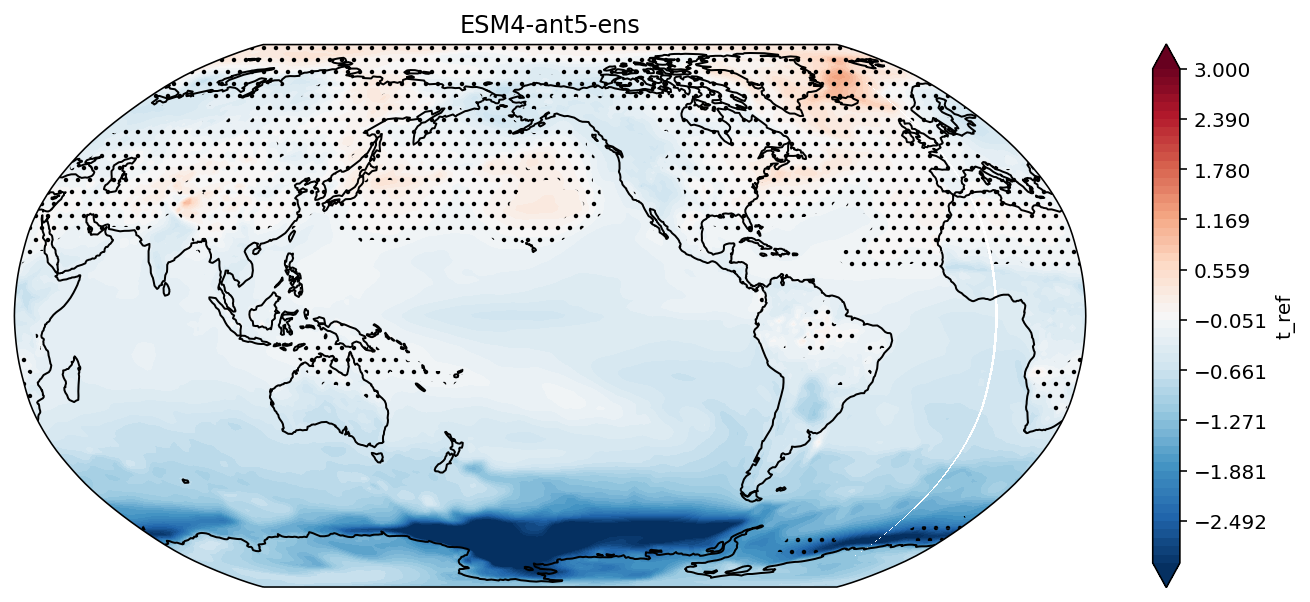

In [61]:
%%time
plot_globalmap_difference_sat(diff_sat_ant5.t_ref,
                               ant5_lt_1p64_std_sat,
                               'ESM4-ant5-ens')

plt.savefig('esm4_ant5_sat_90_CI.pdf')

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [12]:
ant1_gt_1p64_std_temp = abs_diff_temp_ant1.where(abs_diff_temp_ant1>1.64*esm4_piC_temp_ann_20_std)
ant2_gt_1p64_std_temp = abs_diff_temp_ant2.where(abs_diff_temp_ant2>1.64*esm4_piC_temp_ann_20_std)
ant3_gt_1p64_std_temp = abs_diff_temp_ant3.where(abs_diff_temp_ant3>1.64*esm4_piC_temp_ann_20_std)
ant4_gt_1p64_std_temp = abs_diff_temp_ant4.where(abs_diff_temp_ant4>1.64*esm4_piC_temp_ann_20_std)
ant5_gt_1p64_std_temp = abs_diff_temp_ant5.where(abs_diff_temp_ant5>1.64*esm4_piC_temp_ann_20_std)
ens_gt_1p64_std_temp = abs_diff_temp_ens.where(abs_diff_temp_ens>1.64*esm4_piC_temp_ann_20_std)

In [13]:
ant1_lt_1p64_std_temp = abs_diff_temp_ant1.where(abs_diff_temp_ant1<1.64*esm4_piC_temp_ann_20_std)
ant2_lt_1p64_std_temp = abs_diff_temp_ant2.where(abs_diff_temp_ant2<1.64*esm4_piC_temp_ann_20_std)
ant3_lt_1p64_std_temp = abs_diff_temp_ant3.where(abs_diff_temp_ant3<1.64*esm4_piC_temp_ann_20_std)
ant4_lt_1p64_std_temp = abs_diff_temp_ant4.where(abs_diff_temp_ant4<1.64*esm4_piC_temp_ann_20_std)
ant5_lt_1p64_std_temp = abs_diff_temp_ant5.where(abs_diff_temp_ant5<1.64*esm4_piC_temp_ann_20_std)
ens_lt_1p64_std_temp = abs_diff_temp_ens.where(abs_diff_temp_ens<1.64*esm4_piC_temp_ann_20_std)

### Edit pfull for pressure level of interest.

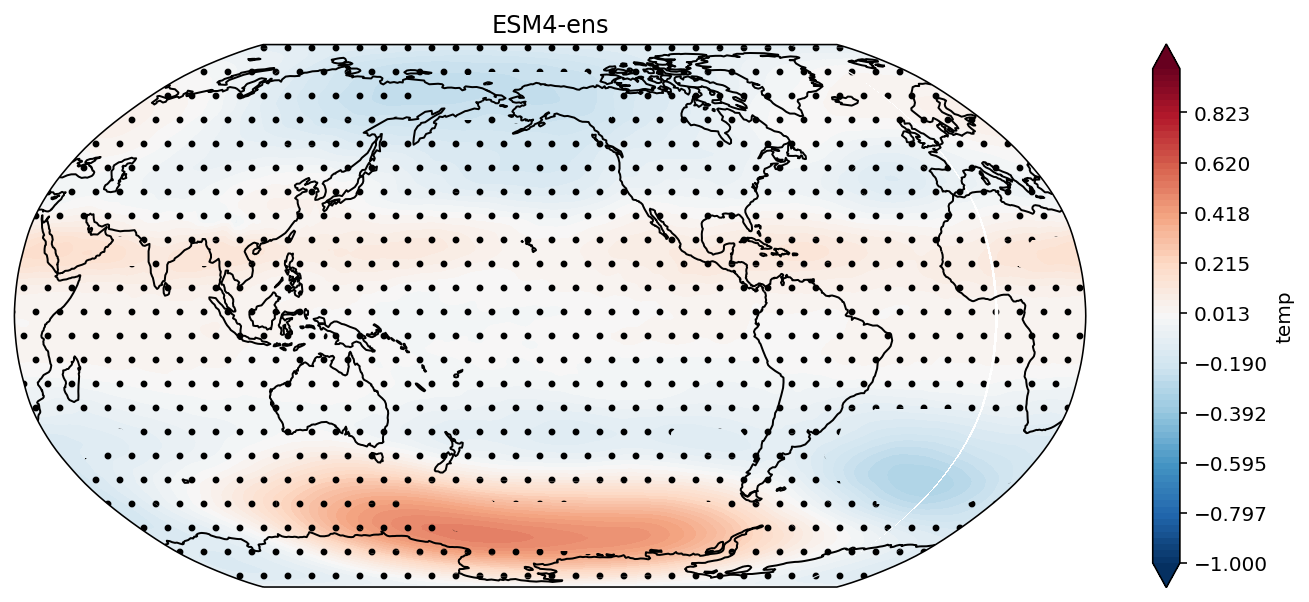

In [14]:
plot_globalmap_difference_temp(diff_temp_ens.temp.sel(pfull=50,method='nearest'),
                               ens_lt_1p64_std_temp.sel(pfull=50,method='nearest'),
                               'ESM4-ens')

plt.savefig('esm4_ens_temp_50mb_90_CI.pdf')

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [46]:
ant1_gt_1p64_std_ptp = abs_diff_ptp_ant1.where(abs_diff_ptp_ant1>1.64*esm4_piC_ptp_ann_20_std)
ant2_gt_1p64_std_ptp = abs_diff_ptp_ant2.where(abs_diff_ptp_ant2>1.64*esm4_piC_ptp_ann_20_std)
ant3_gt_1p64_std_ptp = abs_diff_ptp_ant3.where(abs_diff_ptp_ant3>1.64*esm4_piC_ptp_ann_20_std)
ant4_gt_1p64_std_ptp = abs_diff_ptp_ant4.where(abs_diff_ptp_ant4>1.64*esm4_piC_ptp_ann_20_std)
ant5_gt_1p64_std_ptp = abs_diff_ptp_ant5.where(abs_diff_ptp_ant5>1.64*esm4_piC_ptp_ann_20_std)
ens_gt_1p64_std_ptp = abs_diff_ptp_ens.where(abs_diff_ptp_ens>1.64*esm4_piC_ptp_ann_20_std)

In [47]:
ant1_lt_1p64_std_ptp = abs_diff_ptp_ant1.where(abs_diff_ptp_ant1<1.64*esm4_piC_ptp_ann_20_std)
ant2_lt_1p64_std_ptp = abs_diff_ptp_ant2.where(abs_diff_ptp_ant2<1.64*esm4_piC_ptp_ann_20_std)
ant3_lt_1p64_std_ptp = abs_diff_ptp_ant3.where(abs_diff_ptp_ant3<1.64*esm4_piC_ptp_ann_20_std)
ant4_lt_1p64_std_ptp = abs_diff_ptp_ant4.where(abs_diff_ptp_ant4<1.64*esm4_piC_ptp_ann_20_std)
ant5_lt_1p64_std_ptp = abs_diff_ptp_ant5.where(abs_diff_ptp_ant5<1.64*esm4_piC_ptp_ann_20_std)
ens_lt_1p64_std_ptp = abs_diff_ptp_ens.where(abs_diff_ptp_ens<1.64*esm4_piC_ptp_ann_20_std)

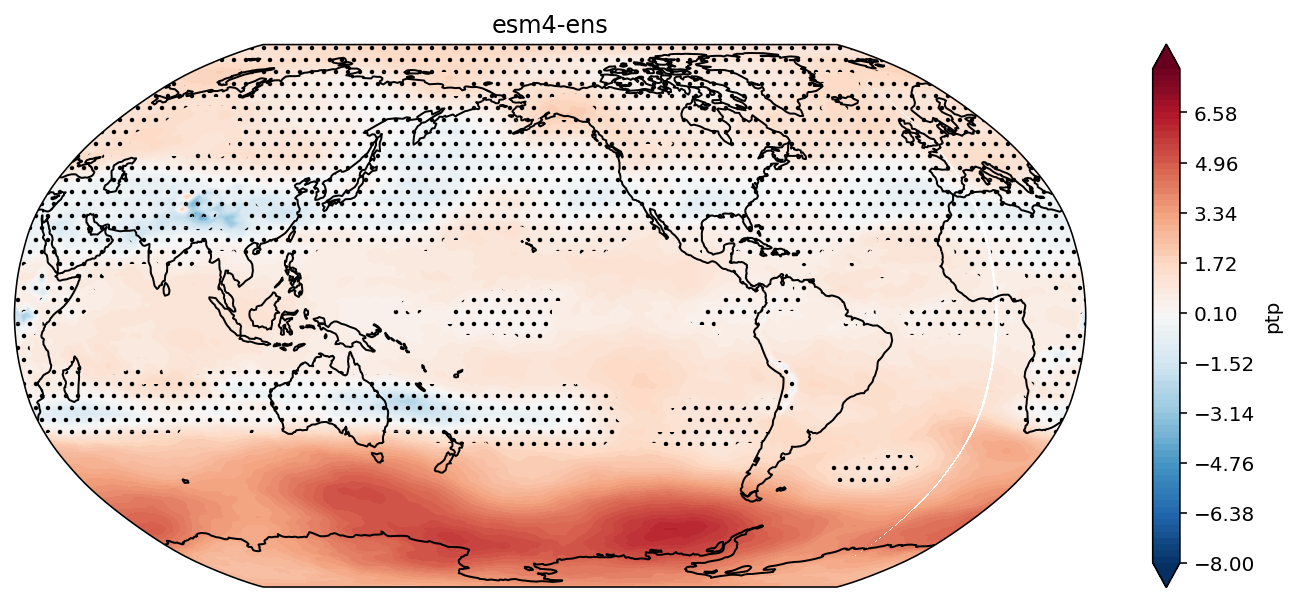

In [87]:
plot_globalmap_difference_ptp(diff_ptp_ens.ptp,
                             ens_lt_1p64_std_ptp,
                             'esm4-ens')

plt.savefig('esm4_ens_ptp_90_CI.pdf')

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [48]:
ant1_gt_1p64_std_ztp = abs_diff_ztp_ant1.where(abs_diff_ztp_ant1>1.64*esm4_piC_ztp_ann_20_std)
ant2_gt_1p64_std_ztp = abs_diff_ztp_ant2.where(abs_diff_ztp_ant2>1.64*esm4_piC_ztp_ann_20_std)
ant3_gt_1p64_std_ztp = abs_diff_ztp_ant3.where(abs_diff_ztp_ant3>1.64*esm4_piC_ztp_ann_20_std)
ant4_gt_1p64_std_ztp = abs_diff_ztp_ant4.where(abs_diff_ztp_ant4>1.64*esm4_piC_ztp_ann_20_std)
ant5_gt_1p64_std_ztp = abs_diff_ztp_ant5.where(abs_diff_ztp_ant5>1.64*esm4_piC_ztp_ann_20_std)
ens_gt_1p64_std_ztp = abs_diff_ztp_ens.where(abs_diff_ztp_ens>1.64*esm4_piC_ztp_ann_20_std)

In [49]:
ant1_lt_1p64_std_ztp = abs_diff_ztp_ant1.where(abs_diff_ztp_ant1<1.64*esm4_piC_ztp_ann_20_std)
ant2_lt_1p64_std_ztp = abs_diff_ztp_ant2.where(abs_diff_ztp_ant2<1.64*esm4_piC_ztp_ann_20_std)
ant3_lt_1p64_std_ztp = abs_diff_ztp_ant3.where(abs_diff_ztp_ant3<1.64*esm4_piC_ztp_ann_20_std)
ant4_lt_1p64_std_ztp = abs_diff_ztp_ant4.where(abs_diff_ztp_ant4<1.64*esm4_piC_ztp_ann_20_std)
ant5_lt_1p64_std_ztp = abs_diff_ztp_ant5.where(abs_diff_ztp_ant5<1.64*esm4_piC_ztp_ann_20_std)
ens_lt_1p64_std_ztp = abs_diff_ztp_ens.where(abs_diff_ztp_ens<1.64*esm4_piC_ztp_ann_20_std)

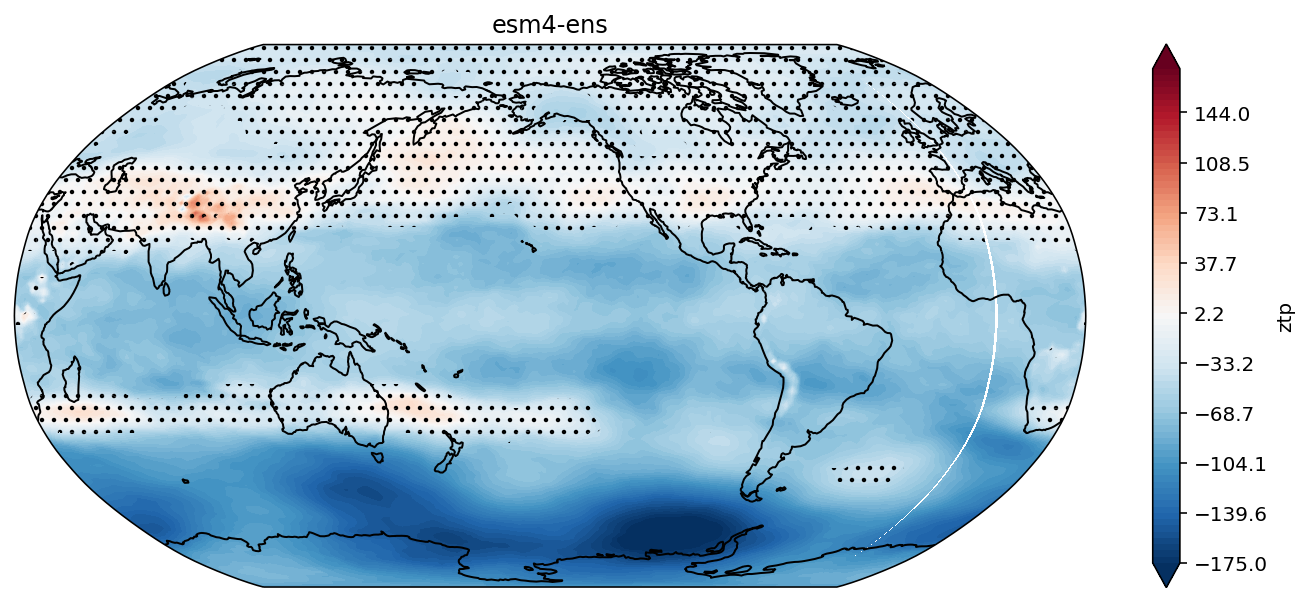

In [95]:
plot_globalmap_difference_ztp(diff_ztp_ens.ztp,
                             ens_lt_1p64_std_ztp,
                             'esm4-ens')

plt.savefig('esm4_ens_ztp_90_CI.pdf')

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [50]:
ant1_gt_1p64_std_precip = abs_diff_precip_ant1.where(abs_diff_precip_ant1>1.64*esm4_piC_precip_ann_20_std)
ant2_gt_1p64_std_precip = abs_diff_precip_ant2.where(abs_diff_precip_ant2>1.64*esm4_piC_precip_ann_20_std)
ant3_gt_1p64_std_precip = abs_diff_precip_ant3.where(abs_diff_precip_ant3>1.64*esm4_piC_precip_ann_20_std)
ant4_gt_1p64_std_precip = abs_diff_precip_ant4.where(abs_diff_precip_ant4>1.64*esm4_piC_precip_ann_20_std)
ant5_gt_1p64_std_precip = abs_diff_precip_ant5.where(abs_diff_precip_ant5>1.64*esm4_piC_precip_ann_20_std)
ens_gt_1p64_std_precip = abs_diff_precip_ens.where(abs_diff_precip_ens>1.64*esm4_piC_precip_ann_20_std)

In [51]:
ant1_lt_1p64_std_precip = abs_diff_precip_ant1.where(abs_diff_precip_ant1<1.64*esm4_piC_precip_ann_20_std)
ant2_lt_1p64_std_precip = abs_diff_precip_ant2.where(abs_diff_precip_ant2<1.64*esm4_piC_precip_ann_20_std)
ant3_lt_1p64_std_precip = abs_diff_precip_ant3.where(abs_diff_precip_ant3<1.64*esm4_piC_precip_ann_20_std)
ant4_lt_1p64_std_precip = abs_diff_precip_ant4.where(abs_diff_precip_ant4<1.64*esm4_piC_precip_ann_20_std)
ant5_lt_1p64_std_precip = abs_diff_precip_ant5.where(abs_diff_precip_ant5<1.64*esm4_piC_precip_ann_20_std)
ens_lt_1p64_std_precip = abs_diff_precip_ens.where(abs_diff_precip_ens<1.64*esm4_piC_precip_ann_20_std)

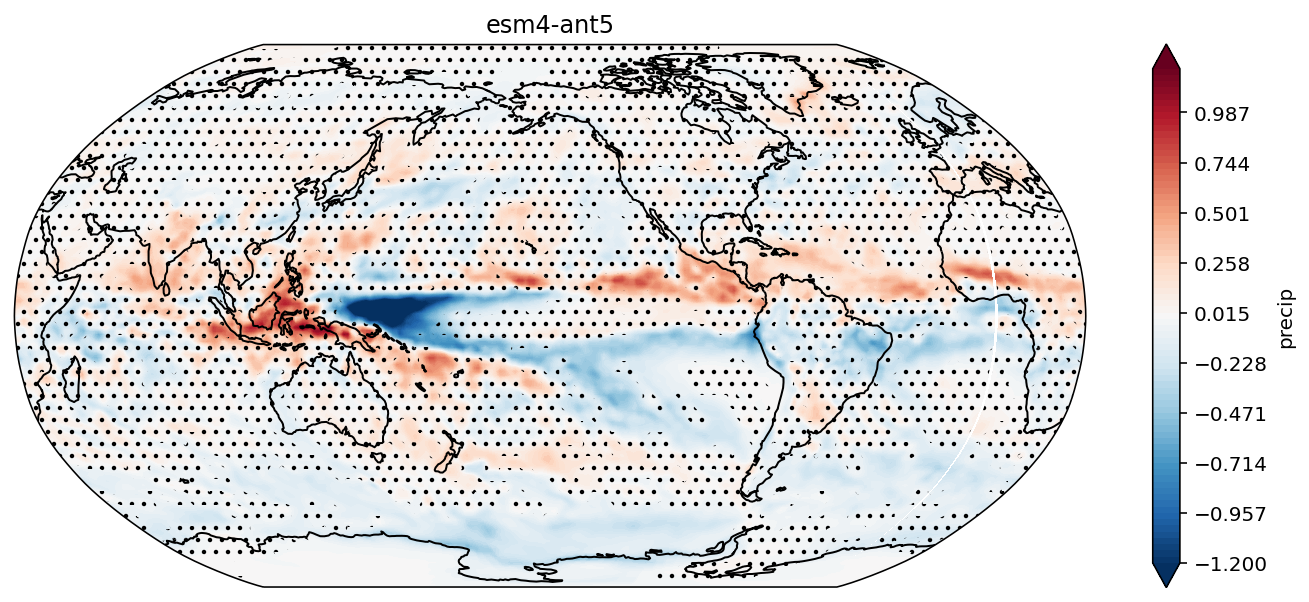

In [104]:
plot_globalmap_difference_precip(diff_precip_ant5.precip*86400,
                             ant5_lt_1p64_std_precip,
                             'esm4-ant5')

plt.savefig('esm4_ant5_precip_90_CI.pdf')

### Function for plotting wind stress anomalies with sea ice extent boundary overlaid.

In [105]:
def plot_globalmap_difference_taux(arr,array_std,piC_sic_arr,arr_sic, piC_taux, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = arr.plot.contourf(x='geolon_u',y='geolat_u',
        transform=ccrs.PlateCarree(),
        vmin=-0.025,vmax=0.025, levels=60, 
        cmap='RdBu_r',extend='both'
    )
    
    array_std.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    
    piC_sic_arr.siconc.plot.contour(levels=[15],
                                    colors='k',
                                    linestyles='--',
                                    transform =ccrs.PlateCarree())
    
    arr_sic.siconc.plot.contour(levels=[.15],
                                colors='k',
                                linestyles='-',
                                transform =ccrs.PlateCarree())
    piC_taux.tauuo.plot.contour(levels=[0],
                                colors='lightseagreen',
                                linestyles='-',
                                transform =ccrs.PlateCarree())
    
    
    plt.title(title)
    ax.axes.coastlines()

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [52]:
ant1_gt_1p64_std_tauuo = abs_diff_taux_ant1.where(abs_diff_taux_ant1>1.64*esm4_piC_taux_ann_20_std)
ant2_gt_1p64_std_tauuo = abs_diff_taux_ant2.where(abs_diff_taux_ant2>1.64*esm4_piC_taux_ann_20_std)
ant3_gt_1p64_std_tauuo = abs_diff_taux_ant3.where(abs_diff_taux_ant3>1.64*esm4_piC_taux_ann_20_std)
ant4_gt_1p64_std_tauuo = abs_diff_taux_ant4.where(abs_diff_taux_ant4>1.64*esm4_piC_taux_ann_20_std)
ant5_gt_1p64_std_tauuo = abs_diff_taux_ant5.where(abs_diff_taux_ant5>1.64*esm4_piC_taux_ann_20_std)
ens_gt_1p64_std_tauuo = abs_diff_taux_ens.where(abs_diff_taux_ens>1.64*esm4_piC_taux_ann_20_std)

In [53]:
ant1_lt_1p64_std_tauuo = abs_diff_taux_ant1.where(abs_diff_taux_ant1<1.64*esm4_piC_taux_ann_20_std)
ant2_lt_1p64_std_tauuo = abs_diff_taux_ant2.where(abs_diff_taux_ant2<1.64*esm4_piC_taux_ann_20_std)
ant3_lt_1p64_std_tauuo = abs_diff_taux_ant3.where(abs_diff_taux_ant3<1.64*esm4_piC_taux_ann_20_std)
ant4_lt_1p64_std_tauuo = abs_diff_taux_ant4.where(abs_diff_taux_ant4<1.64*esm4_piC_taux_ann_20_std)
ant5_lt_1p64_std_tauuo = abs_diff_taux_ant5.where(abs_diff_taux_ant5<1.64*esm4_piC_taux_ann_20_std)
ens_lt_1p64_std_tauuo = abs_diff_taux_ens.where(abs_diff_taux_ens<1.64*esm4_piC_taux_ann_20_std)

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


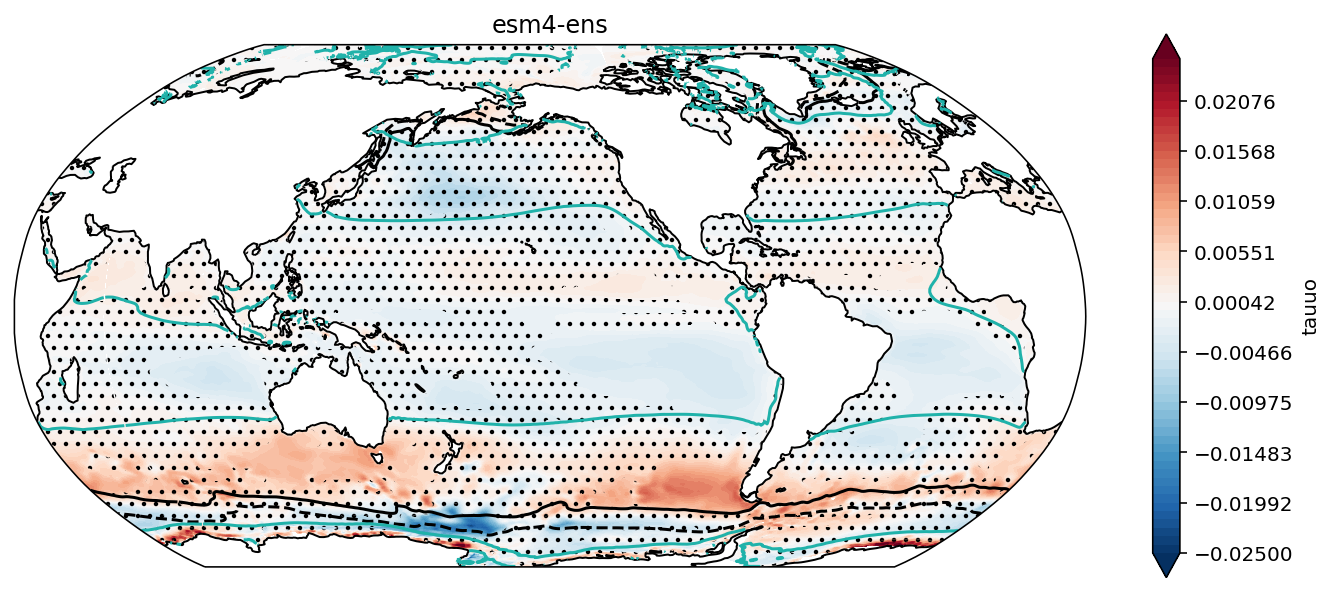

In [115]:
plot_globalmap_difference_taux(diff_taux_ens.tauuo,
                             ens_lt_1p64_std_tauuo,
                             piC_sic_ave,
                             ant_sic_ens_ave,
                             piC_taux_ave, 
                             'esm4-ens')

plt.savefig('esm4_ens_taux_90_CI.pdf')